# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Required Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Capstone Project/Data & Resources/SeoulBikeData.csv',sep=',',encoding='latin')

# **EDA**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Dataset contain 14 columns and 8760 rows having data type object,int64,float64.

In dataset there is no nullvalues.


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# list of columns:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# lets bring column names in standard format:
df.rename({'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},axis='columns',inplace=True)

In [ ]:
# Highest rented bike count
df[df['Rented_bike_count']==3556]

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes


In [ ]:
df.head(5)

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

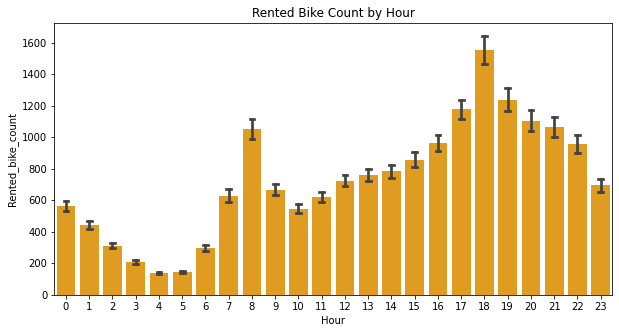

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Rented Bike Count by Hour')

ax = sns.barplot(x=df['Hour'], y=df['Rented_bike_count'], data=df, estimator=np.mean, ci=90, capsize=.2, color='orange',)

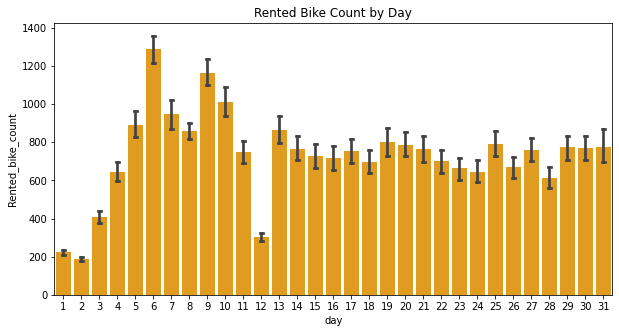

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Rented Bike Count by Day')

ax = sns.barplot(x=df['day'], y=df['Rented_bike_count'], data=df, estimator=np.mean, ci=90, capsize=.2, color='orange',)

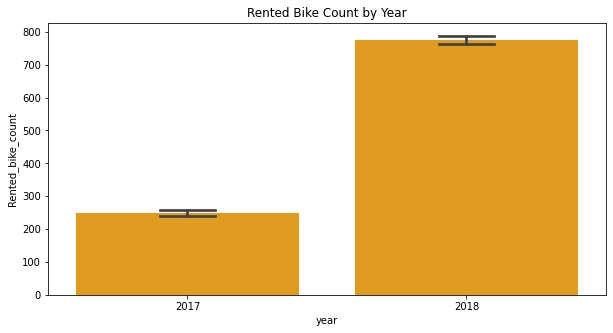

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Rented Bike Count by Year')

ax = sns.barplot(x=df['year'], y=df['Rented_bike_count'], data=df, estimator=np.mean, ci=90, capsize=.2, color='orange',)

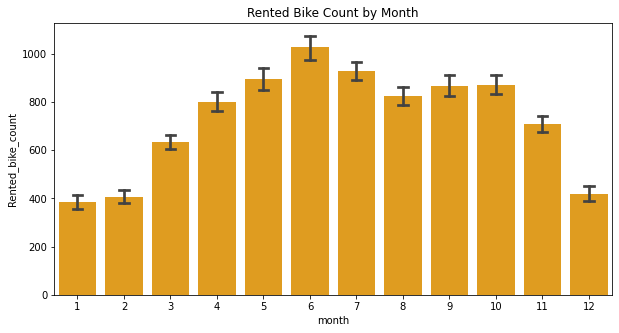

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Rented Bike Count by Month')
ax = sns.barplot(x=df['month'], y=df['Rented_bike_count'], data=df, estimator=np.mean, ci=90, capsize=.2, color='orange',)


# **Exploring Catagorical Features**

In [ ]:
catagorical_feature = ['Seasons','Holiday','Functioning_Day']
for col in catagorical_feature:
  print(df[col].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning_Day, dtype: int64


<Figure size 2160x720 with 0 Axes>

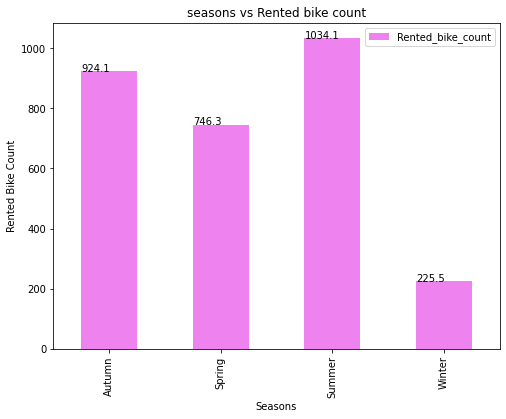

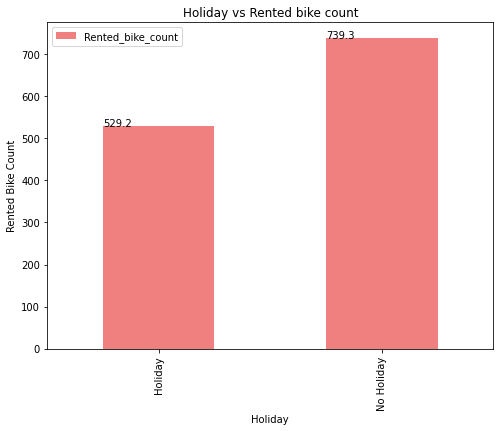

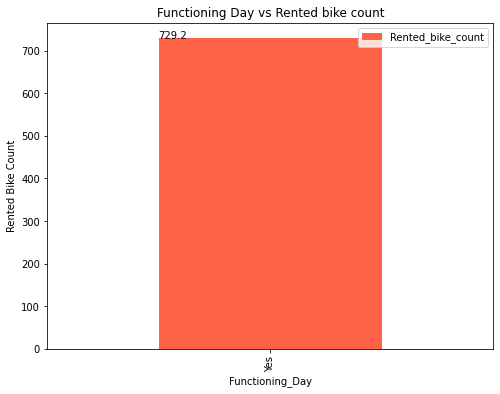

In [ ]:
plt.figure(figsize=(30, 10))
ax = pd.DataFrame(df.groupby(['Seasons'])['Rented_bike_count'].mean())
n = ax.plot.bar(ylabel = 'Rented Bike Count', title = 'seasons vs Rented bike count', figsize = (8, 6), color = 'violet')
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.1))


ax = pd.DataFrame(df.groupby(['Holiday'])['Rented_bike_count'].mean())
n = ax.plot.bar(ylabel = 'Rented Bike Count', title = 'Holiday vs Rented bike count', figsize = (8, 6), color = 'lightcoral')
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.1))


ax = pd.DataFrame(df.groupby(['Functioning_Day'])['Rented_bike_count'].mean())
n = ax.plot.bar(ylabel = 'Rented Bike Count', title = 'Functioning Day vs Rented bike count', figsize = (8, 6), color = 'tomato')
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.1))

plt.show()

from above graphs we can conclude that...
* Highest bike rented in summer and lowest in winter.
* on holiday bike rent count is less as compared to non holidays.
* there is no bike rented on non functioning day.

# **Exploring Numerical Features**

In [ ]:
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

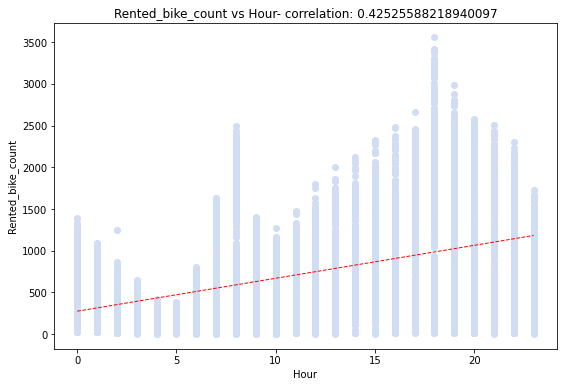

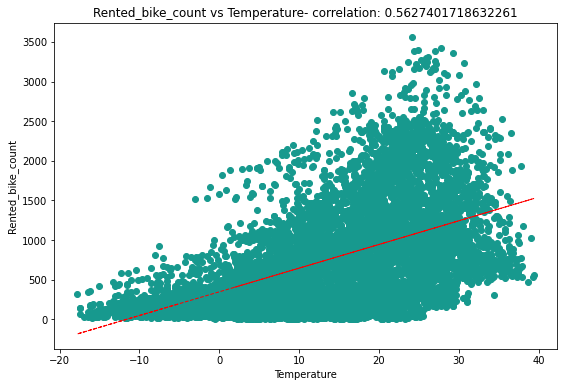

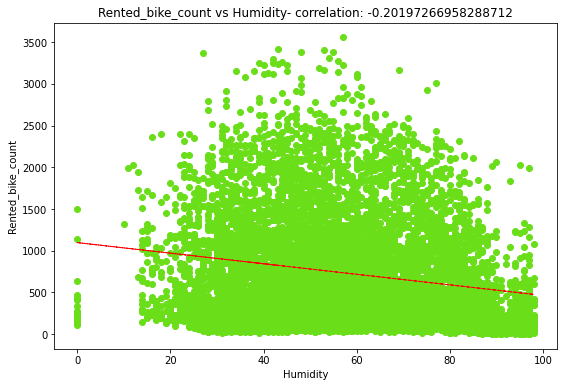

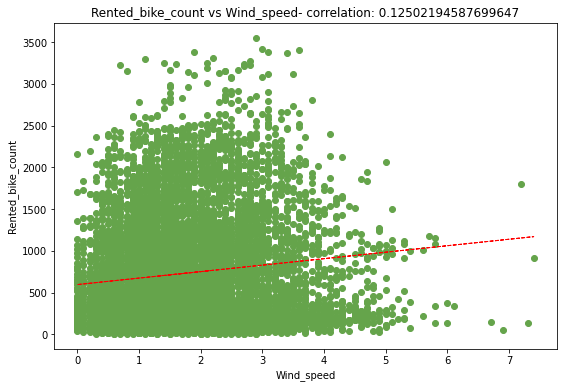

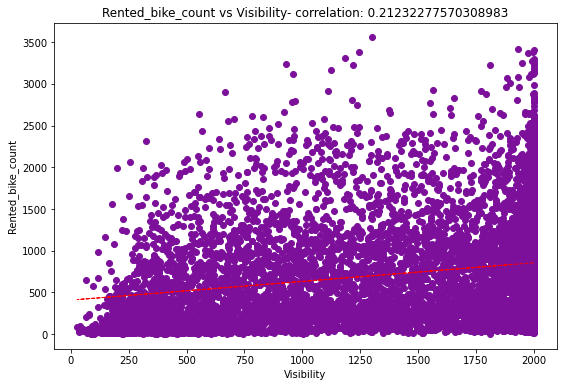

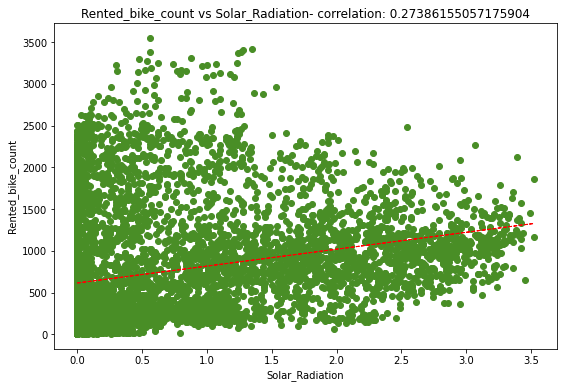

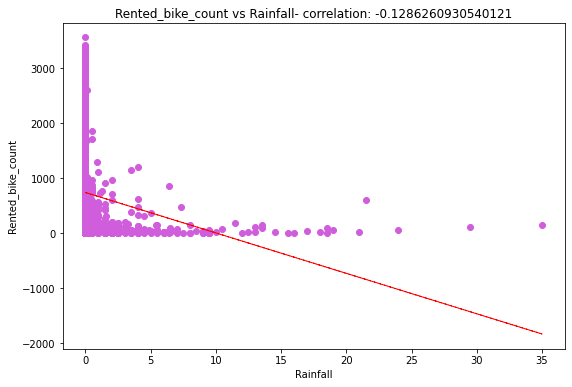

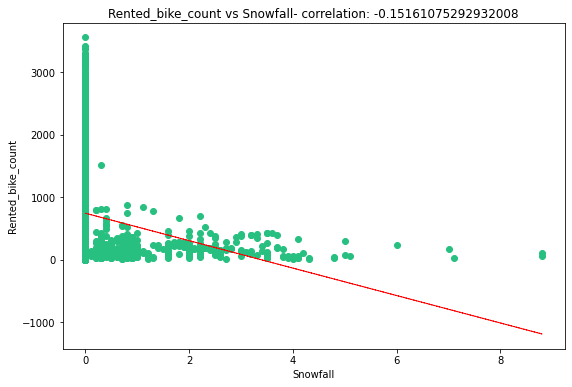

In [ ]:
for col in numerical_features:

  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented_bike_count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color= (np.random.random_sample(), np.random.random_sample(), np.random.random_sample()))
  plt.xlabel(col)
  plt.ylabel('Rented_bike_count')
  ax.set_title('Rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented_bike_count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

* earlier we found that in summer bike rented count is high this is also      explained by temperature vs Rented bike count graph.
* As Temperature increases Rented bike count increases.
* Humidity,snowfall,Rainfall are negatively correlated with bike count.
* Rented Bike count decrease with increase in Humidity,snowfall,Rainfall.
* Wind speed not affect much on rented bike count.

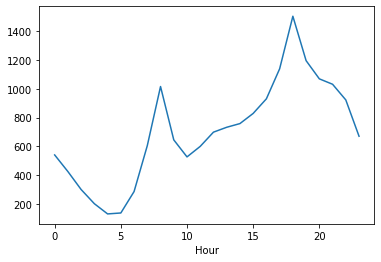

In [ ]:
df.groupby(df['Hour'])['Rented_bike_count'].mean().plot()

* above plot shows the requirement of bikes per hour in a day(24 hours).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


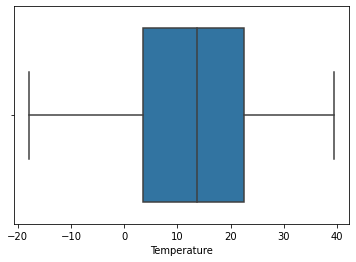

In [ ]:
# lets check outliers in temperature column:
sns.boxplot(df['Temperature'])

* There is no outliers in Temperature values.

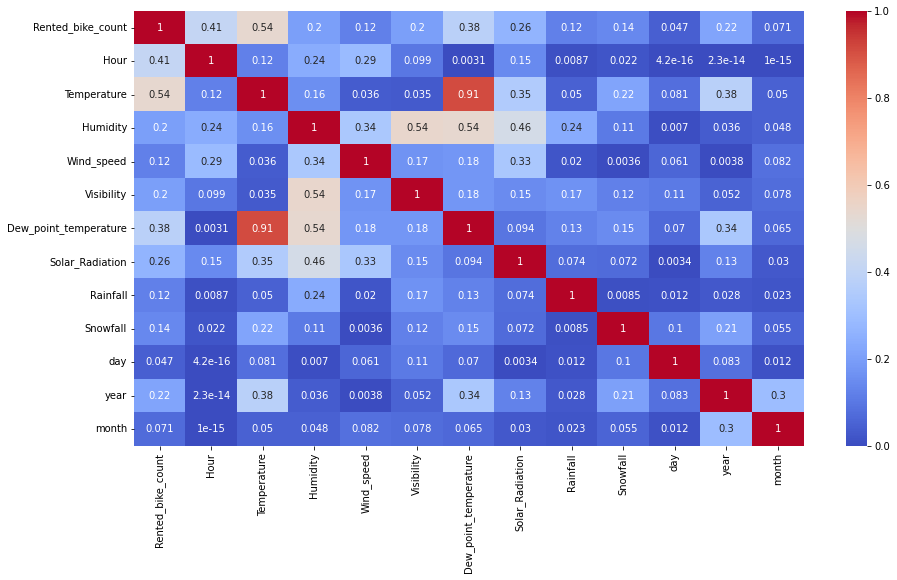

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

* Temperature and Dew point Temperature are highly correlated with each other.

# **Data preparation**

* we take only Functioning Day because there is no bike rented on non functioning day.

In [ ]:
df = df[df['Functioning_Day']=='Yes']

In [ ]:
df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,year,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1


In [ ]:
df_new = df.drop(['Dew_point_temperature', 'Functioning_Day','Date'], axis = 1)


In [ ]:
df_new

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,day,year,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,12,2017,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,12,2017,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,12,2017,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,12,2017,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,12,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,30,2018,11
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,30,2018,11
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,30,2018,11
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,30,2018,11


we have two catagorical columns in our dataset seasons and holiday. so lets convert it into numerical features.

In [ ]:
def Seasons_label(x):
  if str(x) == 'Winter':
    return 0
  elif str(x) == 'Autumn':
    return 1
  elif str(x) == 'Spring':
    return 2
  elif  str(x) == 'Summer':
    return 3


In [ ]:
def Holiday_label(x):
  if str(x) == 'Holiday':
    return 1
  else :
    return 0

In [ ]:
df_new['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

In [ ]:
df_new['Seasons'] = df_new['Seasons'].apply(lambda x : Seasons_label(x))

In [ ]:
df_new['Holiday'] = df_new['Holiday'].apply(lambda x : Holiday_label(x))

In [ ]:
df_new.head()

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,day,year,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,12,2017,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,12,2017,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,12,2017,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,12,2017,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,12,2017,1


* this is our new dataset with only numerical values.

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
x = df_new.drop(labels='Rented_bike_count',axis=1)

In [ ]:
x.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,day,year,month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,12,2017,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,12,2017,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,12,2017,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,12,2017,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,12,2017,1


In [ ]:
y = df_new['Rented_bike_count']

In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented_bike_count, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6348, 13), (2117, 13), (6348,), (2117,))

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
Lreg = LinearRegression()
Lreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
Lreg.coef_

array([ 2.83091245e+01,  3.20609929e+01, -7.72068939e+00,  1.10300670e+01,
        1.49778685e-02, -8.49423122e+01, -6.38082683e+01,  1.77888934e+01,
       -1.22750352e+01, -1.08392714e+02,  7.26372483e-01,  1.46574223e+02,
        1.52950611e+01])

In [ ]:
Lreg.intercept_

-295399.161597239

In [ ]:
y_pred_train = Lreg.predict(x_train)
y_pred = Lreg.predict(x_test)

# Model Evaluation

In [ ]:
r2_score_l = r2_score(y_test, y_pred)
print('r2 score: ',r2_score_l)

adj_r2_l = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_l)

MSE_l  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE_l)

RMSE_l = np.sqrt(MSE_l)
print("RMSE :" ,RMSE_l)

MAE_l  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE_l)

r2 score:  0.511273890553961
Adjusted R2 :  0.5082527591118314
MSE : 197192.37607000768
RMSE : 444.063482027072
MAE : 331.2534202225446


Text(0, 0.5, 'Predicted')

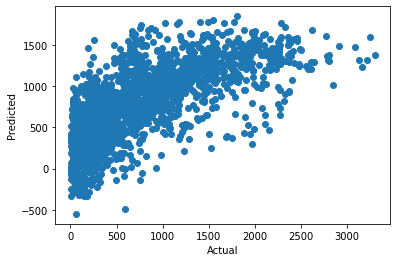

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

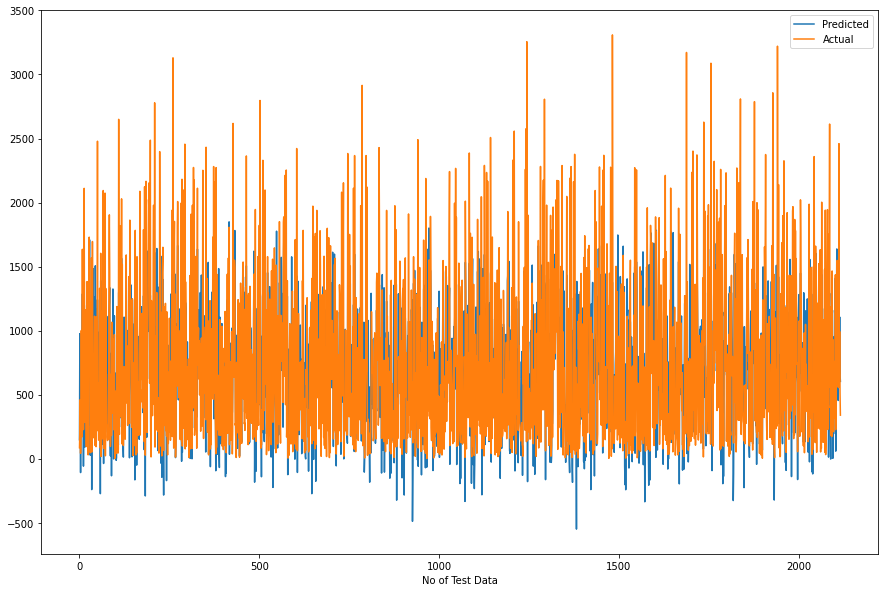

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
y_pred_train = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

# Model Evaluation

In [ ]:
r2_score_lso = r2_score(y_test, y_pred)
print('r2 score: ',r2_score_lso)


adj_r2_lso = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_lso)

MSE_lso  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE_lso)

RMSE_lso = np.sqrt(MSE_lso)
print("RMSE :" ,RMSE_lso)

MAE_lso  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE_lso)

r2 score:  0.5112720773221827
Adjusted R2 :  0.5082509346712976
MSE : 197193.1076770895
RMSE : 444.06430579037703
MAE : 331.25299104181437


**Running Grid Search Cross Validation for Lasso Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.182e+08, tolerance: 1.745e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.130e+08, tolerance: 1.745e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -198984.51681788347


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
print('r2 score: ',r2_score(y_test, y_pred_lasso))


adj_r2 = 1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_test, y_pred_lasso)
print("MAE :" , MAE)

r2 score:  0.5112738905539596
Adjusted R2 :  0.50825275911183
MSE : 197192.37607000826
RMSE : 444.06348202707267
MAE : 331.2534202225446


# **Ridge Regression**

In [ ]:
ridge = Ridge(alpha=30)
ridge.fit(x_train,y_train)

Ridge(alpha=30)

In [ ]:
y_pred_train = ridge.predict(x_train)
y_pred = ridge.predict(x_test)

# Model Evaluation

In [ ]:
r2_score_rig = r2_score(y_test, y_pred)
print('r2 score: ',r2_score_rig)

adj_r2_rig = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_rig)

MSE_rig  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE_rig)

RMSE_rig = np.sqrt(MSE_rig)
print("RMSE :" ,RMSE_rig)

MAE_rig  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE_rig)

r2 score:  0.5111650138143895
Adjusted R2 :  0.5081432093348779
MSE : 197236.30591652068
RMSE : 444.1129427482616
MAE : 331.2423561841483


**Running Grid Search Cross Validation for Ridge Regression**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -198981.25020341598


In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [ ]:
y_pred_ridge = ridge.predict(x_test)

In [ ]:
print('r2 score: ',r2_score(y_test, y_pred_ridge))

adj_r2 = 1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_test, y_pred_ridge)
print("MAE :" , MAE)

r2 score:  0.5112414228806925
Adjusted R2 :  0.5082200907349241
MSE : 197205.47620424145
RMSE : 444.07823207655815
MAE : 331.24846659147397


# **Elastic net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
r2_score_el = r2_score(y_test, y_pred_en)
print('r2 score: ',r2_score_el)

adj_r2_el = 1-(1-r2_score((y_test), (y_pred_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_el)

MSE_el  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE_el)

RMSE_el = np.sqrt(MSE_el)
print("RMSE :" ,RMSE_el)

MAE_el  = mean_absolute_error(y_test, y_pred_en)
print("MAE :" , MAE_el)

r2 score:  0.509782089945724
Adjusted R2 :  0.5067517367214227
MSE : 197794.29133681094
RMSE : 444.7407012370365
MAE : 331.5457279815879


**Running Grid Search Cross Validation for ELastic Net Regression**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+08, tolerance: 2.129e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.962e+08, tolerance: 2.085e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -198962.56695226303


In [ ]:
el_optimal = elastic_regressor.best_estimator_

In [ ]:
y_pred_elastic = el_optimal.predict(x_test)

In [ ]:
print('r2 score: ',r2_score(y_test, y_pred_elastic))

adj_r2 = 1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE  = mean_absolute_error(y_test, y_pred_elastic)
print("MAE :" , MAE)

r2 score:  0.5111822315901979
Adjusted R2 :  0.5081605335448687
MSE : 197229.3588472795
RMSE : 444.1051213927616
MAE : 331.2430074650221


# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_train = tree.predict(x_train)
y_pred = tree.predict(x_test)

In [ ]:
r2_score_dt = r2_score(y_test, y_pred)
print('r2 score: ',r2_score_dt)

adj_r2_dt = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_dt)


MSE_dt  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE_dt)

RMSE_dt = np.sqrt(MSE_dt)
print("RMSE :" ,RMSE_dt)

MAE_dt  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE_dt)

r2 score:  0.7211579951951644
Adjusted R2 :  0.7194342928354579
MSE : 112507.83703353803
RMSE : 335.42187918133493
MAE : 191.72555503070382


Text(0, 0.5, 'Predicted')

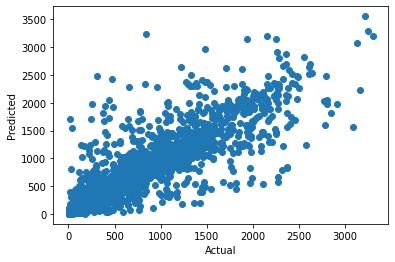

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

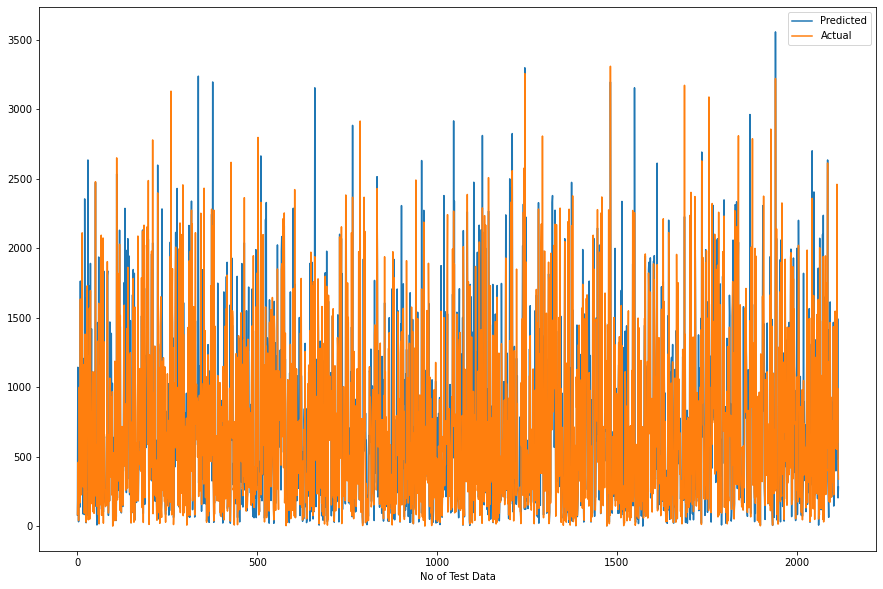

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Feature Importance

In [ ]:
tree.feature_importances_

array([0.31941182, 0.34672509, 0.11680885, 0.0152664 , 0.01279422,
       0.09779592, 0.01942635, 0.00107461, 0.03948459, 0.00208022,
       0.01499064, 0.00049027, 0.01365102])

In [ ]:
features = x.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

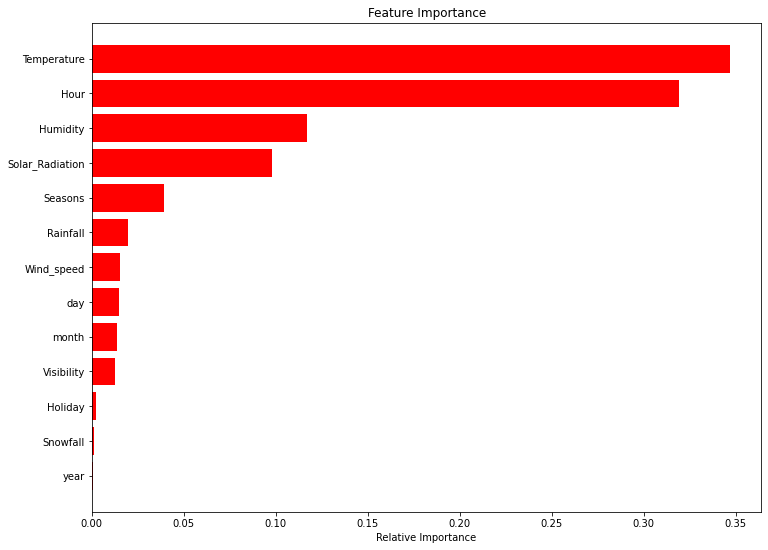

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
r2_score_rf = r2_score(y_test, y_pred_rf)
print('r2 score: ',r2_score_rf)

adj_r2_rf = 1-(1-r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_rf)


MSE_rf  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

MAE_rf  = mean_absolute_error(y_test, y_pred_rf)
print("MAE :" , MAE_rf)

r2 score:  0.8561337320607516
Adjusted R2 :  0.8552444018262246
MSE : 58047.50485588096
RMSE : 240.9304979779043
MAE : 145.1818091639112


Text(0, 0.5, 'Predicted')

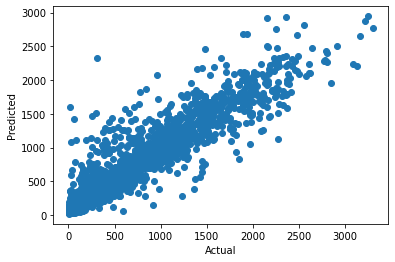

In [ ]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# **Parameter Tunning**

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [ ]:
rf_optimal = rf_random.best_estimator_

In [ ]:
y_pred_rf = rf_optimal.predict(x_test)

In [ ]:
r2_score_rf_opt = r2_score(y_test, y_pred_rf)
print('r2 score: ',r2_score_rf_opt)

adj_r2_rf_opt = 1-(1-r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_rf_opt)


MSE_rf_opt  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE_rf_opt)

RMSE_rf_opt = np.sqrt(MSE_rf_opt)
print("RMSE :" ,RMSE_rf_opt)

MAE_rf_opt  = mean_absolute_error(y_test, y_pred_rf)
print("MAE :" , MAE_rf_opt)

r2 score:  0.8682174799303642
Adjusted R2 :  0.8674028471386832
MSE : 53171.925450187475
RMSE : 230.5903845570918
MAE : 144.5852127224059


# **GradiantBoosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_gb = GB.predict(x_test)

In [ ]:
r2_score_gb = r2_score(y_test, y_pred_gb)
print('r2 score: ',r2_score_gb)

adj_r2_gb = 1-(1-r2_score((y_test), (y_pred_gb)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_gb)


MSE_gb  = mean_squared_error(y_test, y_pred_gb)
print("MSE :" , MSE_gb)

RMSE_gb = np.sqrt(MSE_gb)
print("RMSE :" ,RMSE_gb)

MAE_gb  = mean_absolute_error(y_test, y_pred_gb)
print("MAE :" , MAE_gb)

r2 score:  0.8362019082129659
Adjusted R2 :  0.8351893665138544
MSE : 66089.64467200155
RMSE : 257.0790630759369
MAE : 170.8973866255099


Text(0, 0.5, 'Predicted')

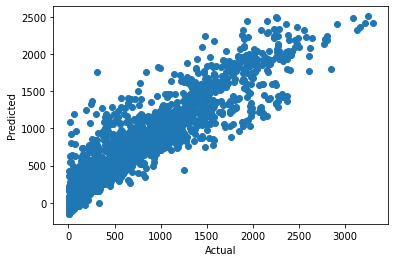

In [ ]:
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual')
plt.ylabel('Predicted')

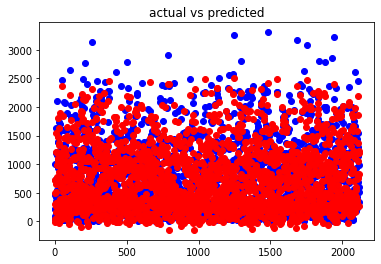

In [ ]:
    plt.scatter(range(len(y_test)), y_test, color='blue',label='actual')
    plt.scatter(range(len(y_pred_gb)), y_pred_gb, color='red',label='predicted')
    plt.title('actual vs predicted')
    plt.show()

# **XGBoost**

In [ ]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, Y_train)
y_pred = dreg.predict(X_test)

r2_score_xg = r2_score(Y_test, y_pred)
print('r2 score: ',r2_score_xg)

adj_r2_xg = 1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_xg)


MSE_xg  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

MAE_xg  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE_xg)


[01:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.8853679785671508
Adjusted R2 :  0.8848319295460619
MSE : 46519.01274371165
RMSE : 215.6826667669696
MAE : 129.51829923794963


# **Parameter Tunning**

In [ ]:
params = {
            'min_child_weight':[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          }

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = params,                        
                           cv = 3,
                           verbose = 1)


In [ ]:
grid_search.fit(x,y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[01:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:02] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
grid_search.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =grid_search.best_estimator_

In [ ]:
y_pred_optimal = reg_optimal_model.predict(X_test)

In [ ]:
r2_score_xg_opt = r2_score(Y_test, y_pred_optimal)
print('r2 score: ',r2_score_xg_opt)

adj_r2_xg_opt = 1-(1-r2_score((Y_test), (y_pred_optimal)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2_xg_opt)


MSE_xg_opt  = mean_squared_error(Y_test, y_pred_optimal)
print("MSE :" , MSE_xg_opt)

RMSE_xg_opt = np.sqrt(MSE_xg_opt)
print("RMSE :" ,RMSE_xg_opt)

MAE_xg_opt  = mean_absolute_error(Y_test, y_pred_optimal)
print("MAE :" , MAE_xg_opt)


r2 score:  0.9680701329511177
Adjusted R2 :  0.9679208206231912
MSE : 12957.512862338226
RMSE : 113.83107160322363
MAE : 68.45280472406252


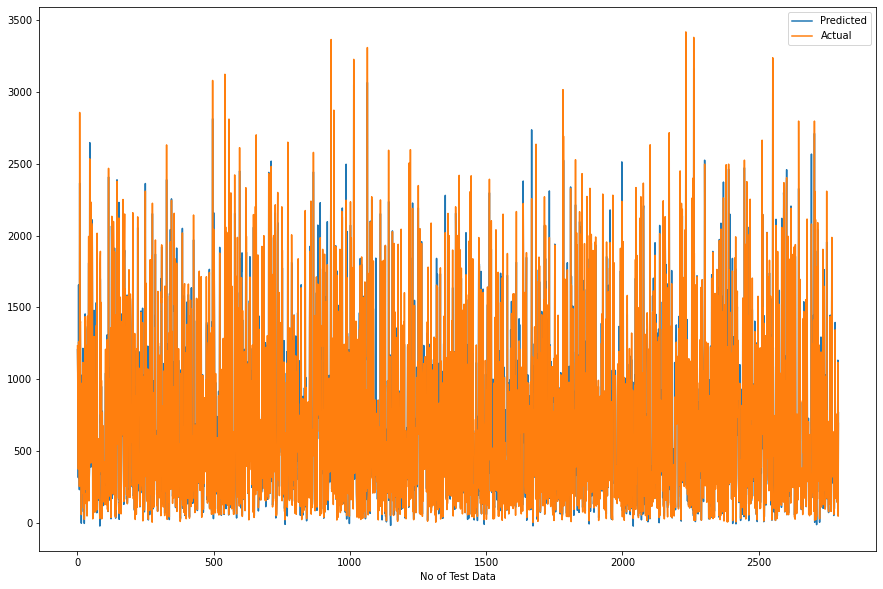

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_optimal)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Final Results**

In [ ]:
Data = [('Linear Regression',r2_score_l,adj_r2_l,MSE_l,RMSE_l,MAE_l),
        ('Lasso Regression',r2_score_lso,adj_r2_lso,MSE_lso,RMSE_lso,MAE_lso),
        ('Ridge Regression',r2_score_rig,adj_r2_rig,MSE_rig,RMSE_rig,MAE_rig),
        ('Elasctic Net',r2_score_el,adj_r2_el,MSE_el,RMSE_el,MAE_el),
        ('Decision Tree',r2_score_dt,adj_r2_dt,MSE_dt,RMSE_dt,MAE_dt),
        ('Random Forest',r2_score_rf,adj_r2_rf,MSE_rf,RMSE_rf,MAE_rf),
        ('Random Forest Optimal',r2_score_rf_opt,adj_r2_rf_opt,MSE_rf_opt,RMSE_rf_opt,MAE_rf_opt),
        ('GradientBoosting',r2_score_gb,adj_r2_gb,MSE_gb,RMSE_gb,MAE_gb),
        ('XGBoost',r2_score_xg,adj_r2_xg,MSE_xg,RMSE_xg,MAE_xg),
        ('XGBoost Optimal',r2_score_xg_opt,adj_r2_xg_opt,MSE_xg_opt,RMSE_xg_opt,MAE_xg_opt)]

In [ ]:
Scores_ =pd.DataFrame(data = Data, columns=['Model Name','r2 score', 'Adj r2score', 'MSE', 'RMSE','MAE'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,r2 score,Adj r2score,MSE,RMSE,MAE
Model Name,,,,,
Linear Regression,0.511274,0.508253,197192.376070,444.063482,331.253420
Lasso Regression,0.511272,0.508251,197193.107677,444.064306,331.252991
Ridge Regression,0.511165,0.508143,197236.305917,444.112943,331.242356
Elasctic Net,0.509782,0.506752,197794.291337,444.740701,331.545728
Decision Tree,0.721158,0.719434,112507.837034,335.421879,191.725555
Random Forest,0.856134,0.855244,58047.504856,240.930498,145.181809
Random Forest Optimal,0.868217,0.867403,53171.925450,230.590385,144.585213
GradientBoosting,0.836202,0.835189,66089.644672,257.079063,170.897387
XGBoost,0.885368,0.884832,46519.012744,215.682667,129.518299


# **Conclusion**

**The Rented Bike count is highly correlated with temperature i.e in summer more no. of bikes get rented as compared to winter. Whereas it seems that the rentals are independent of the wind speed and the humidity, because they are almost constant over the months.So people mainly rent bikes on nice days and nice temperature. we use different algorithms to build model with high accuracy to predict count of rented bikes. so by comparing results from different algorithm we found that XGBoost algorithm gives best results.XGBoost has highest accuracy 94% and lowest RMSE,MAE with respect to other algorithms.So, finally this model is best for predicting the bike rental count on daily basis.**